# 2. 確率分布と統計モデルの最尤推定

(ざっくり要約)

* ポワソン分布を採用する理由には以下のような例がある．
    1. データが非負のカウントデータである．
    2. データの下限は0だが，上限は不明である．
    3. 平均と分散がほぼ同じである (ポワソン分布の平均と分散は等しいため)．
* 統計モデルで主に使用される確率分布の特徴はざっくり言えば以下の通り．
    * ポワソン分布は，「離散値」で「上限不明」で「平均 ≈ 分散」なカウントデータ．
    * 二項分布は，「離散値」で「有限」で「分散は平均の関数」なカウントデータ．
    * 正規分布は，「連続値」で「範囲が無限」で「平均と分散が無関係」なデータ．
    * ガンマ分布は，「連続値」で「範囲が0以上」で「分散は平均の関数」なデータ．
* 確率分布の採用理由は人に説明できるようにしよう．

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = np.array([2, 2, 4, 6, 4, 5, 2, 3, 1, 2, 0, 4, 3,
                 3, 3, 3, 4, 2, 7, 2, 4, 3, 3, 3, 4,
                 3, 7, 5, 3, 1, 7, 6, 4, 6, 5, 2, 4, 7,
                 2, 2, 6, 2, 4, 5, 4, 5, 1, 3, 2, 3])
data = pd.Series(data)

In [3]:
len(data)  # dataにはいくつのデータが含まれるのか?

50

In [4]:
data.describe()  # dataを要約せよ

count    50.00000
mean      3.56000
std       1.72804
min       0.00000
25%       2.00000
50%       3.00000
75%       4.75000
max       7.00000
dtype: float64

In [5]:
np.histogram(data, bins=7)  # ヒストグラム

(array([ 1,  3, 11, 12, 10,  5,  8]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]))

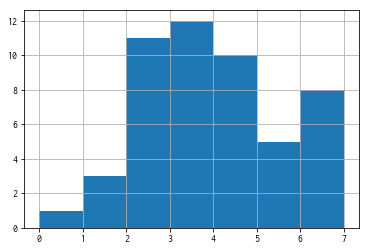

In [6]:
# 注: Pythonの場合は「0以上1未満が1，1以上2未満が3」と数えるので少しずれる
data.hist(bins=7)

In [7]:
# 不偏分散 (自由度n-1; データを標本とみなした場合)
np.var(data, ddof=1)  # "delta degrees of freedom"

# 母分散 (自由度n; データを母集団とみなした場合)
# np.var(data)

2.986122448979592

In [8]:
print(np.std(data, ddof=1))
print(np.sqrt(np.var(data, ddof=1)))

1.728040060004279
1.72804006


In [9]:
y = np.arange(9)
prob = stats.poisson.pmf(k=y, mu=3.56)  # <=> dpois(y, lambda=3.56)
prob # "probability mass function" = 変数がある値となる確率

array([ 0.02843882,  0.10124222,  0.18021114,  0.21385056,  0.190327  ,
        0.13551282,  0.08040427,  0.04089132,  0.01819664])

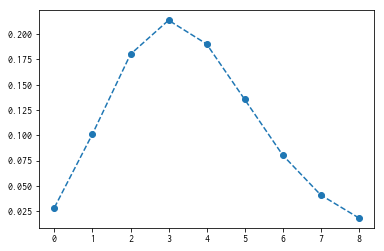

In [10]:
plt.plot(y, prob, 'o--')

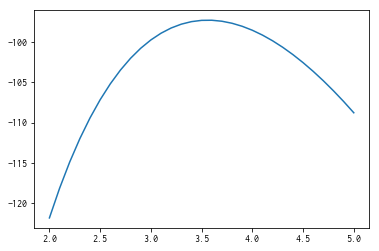

In [11]:
def logL(m):  # 対数尤度を求める関数
    prob = stats.poisson.pmf(data, mu=m)
    log_prob = np.log(prob)
    return sum(log_prob)

lambda_ = np.arange(2, 5.1, 0.1)
likelihood = [logL(i) for i in lambda_]
plt.plot(lambda_, likelihood)